In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load dataset
file_path = "SRBCT_2.xlsx"
df = pd.read_excel(file_path)

print("Initial dataset shape:", df.shape)

Initial dataset shape: (83, 2309)


In [3]:
# Step 2: Separate features and target (assuming last column is target)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [4]:
# Step 3: Optimized mRMR (using all features)

feature = 20
def optimized_mrmr(X, y, n_features=feature):
    # Calculate mutual information for all features
    relevance = mutual_info_classif(X, y, discrete_features='auto')
    relevance_dict = dict(zip(X.columns, relevance))

    # Compute full correlation matrix once (saves time)
    corr_matrix = X.corr().abs()

    selected_features = []
    remaining_features = list(X.columns)

    # Select first feature (highest relevance)
    first_feature = max(relevance_dict, key=relevance_dict.get)
    selected_features.append(first_feature)
    remaining_features.remove(first_feature)

    print(f"Feature 1 selected: {first_feature}")

    # Iteratively select remaining features
    while len(selected_features) < n_features:
        best_score = -np.inf
        best_feature = None

        for feature in remaining_features:
            rel = relevance_dict[feature]
            # Redundancy: average correlation with selected features (fast lookup)
            redundancy = corr_matrix.loc[feature, selected_features].mean()
            score = rel - redundancy

            if score > best_score:
                best_score = score
                best_feature = feature

        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        print(f"Feature {len(selected_features)} selected: {best_feature}")

    return selected_features

selected_features = optimized_mrmr(X, y, n_features=feature)
print("\nTop 20 Selected Features (mRMR):")
print(selected_features)

Feature 1 selected: 770394
Feature 2 selected: 784257
Feature 3 selected: 21652
Feature 4 selected: 207274
Feature 5 selected: 383188
Feature 6 selected: 246377
Feature 7 selected: 841641
Feature 8 selected: 813266
Feature 9 selected: 769716
Feature 10 selected: 43733
Feature 11 selected: 289645
Feature 12 selected: 629896
Feature 13 selected: 204545
Feature 14 selected: 773568
Feature 15 selected: 364934
Feature 16 selected: 308231
Feature 17 selected: 25725
Feature 18 selected: 308163
Feature 19 selected: 741831
Feature 20 selected: 745343

Top 20 Selected Features (mRMR):
[770394, 784257, 21652, 207274, 383188, 246377, 841641, 813266, 769716, 43733, 289645, 629896, 204545, 773568, 364934, 308231, 25725, 308163, 741831, 745343]


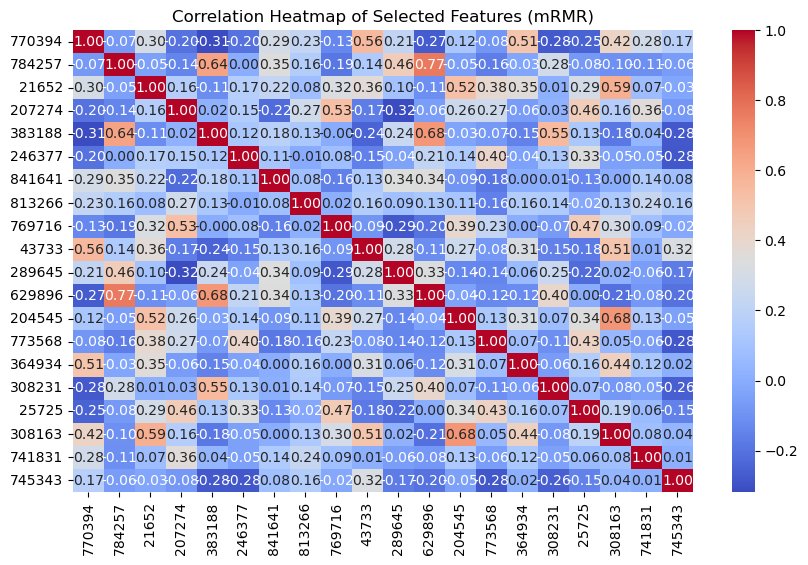

In [5]:
# Visualization 1: Correlation heatmap of selected features
plt.figure(figsize=(10, 6))
sns.heatmap(X[selected_features].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Selected Features (mRMR)")
plt.show()

In [6]:
# Step 4: Scaling (-1, 1)
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X[selected_features]), columns=selected_features)

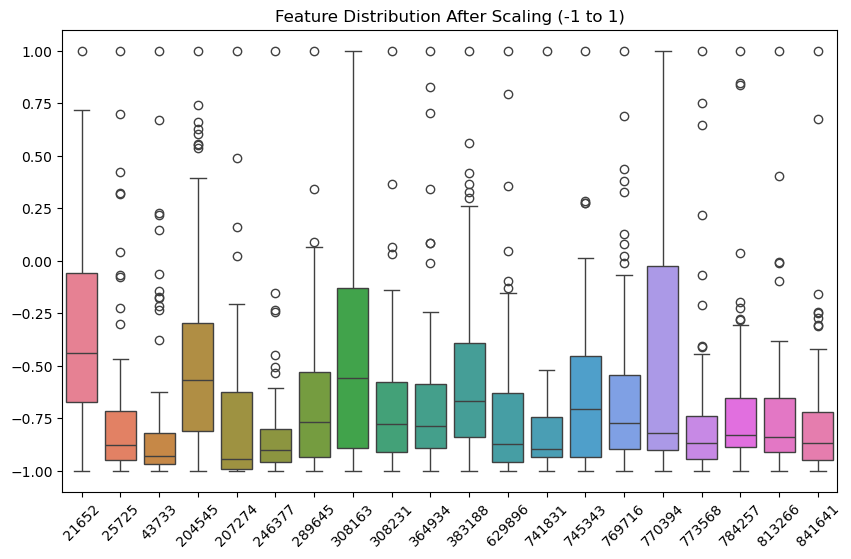

In [7]:
# Visualization 2: Distribution after scaling
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_scaled)
plt.title("Feature Distribution After Scaling (-1 to 1)")
plt.xticks(rotation=45)
plt.show()

In [8]:
# Step 5: Randomize
np.random.seed(42)
shuffled_indices = np.random.permutation(len(X_scaled))
X_randomized = X_scaled.iloc[shuffled_indices].reset_index(drop=True)
y_randomized = y.iloc[shuffled_indices].reset_index(drop=True)

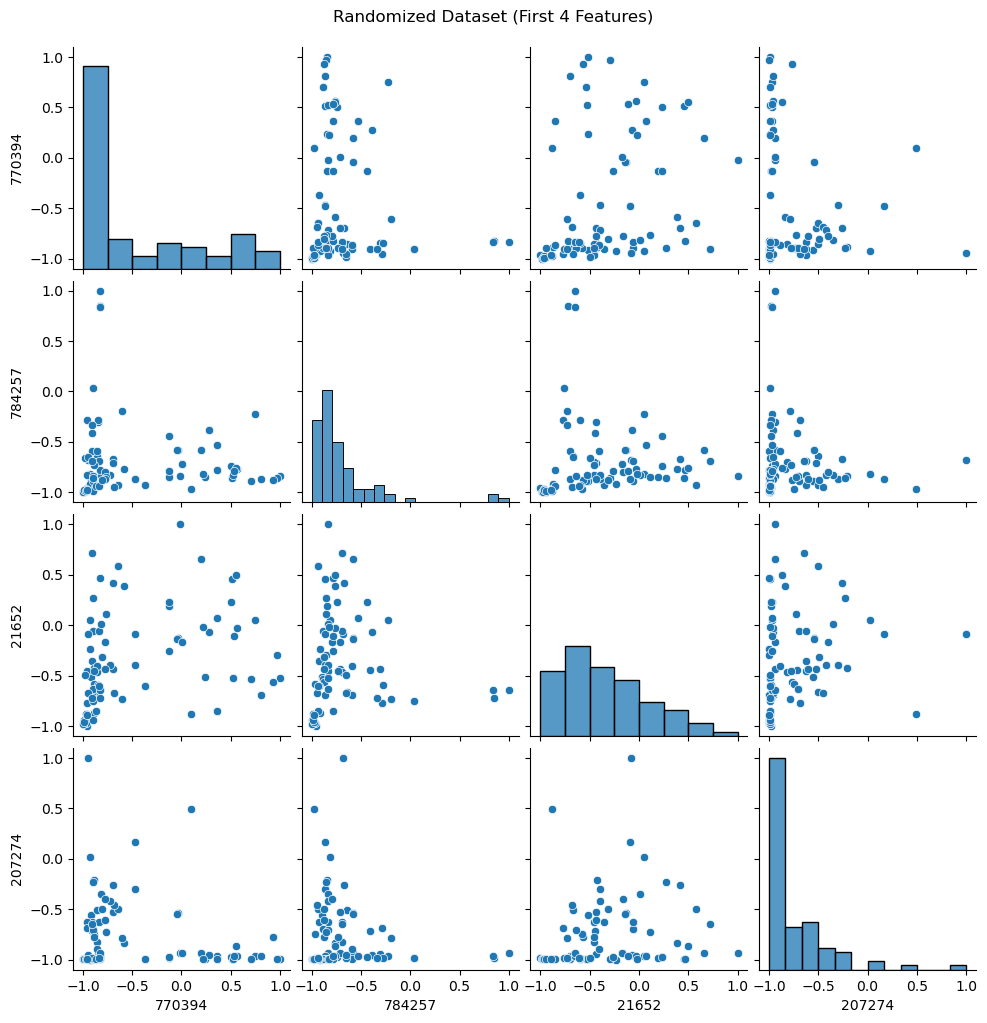

In [9]:
# Visualization 3: Pairplot (first 4 features)
sns.pairplot(X_randomized.iloc[:, :4])
plt.suptitle("Randomized Dataset (First 4 Features)", y=1.02)
plt.show()

In [10]:
print("\nFinal dataset shape after mRMR, scaling, and randomization:", X_randomized.shape)


Final dataset shape after mRMR, scaling, and randomization: (83, 20)


In [11]:
# Combine the processed (randomized) features and target back together
final_dataset = pd.concat([X_randomized, y_randomized.rename("Target")], axis=1)

# Display the final dataset
print("\n✅ Final Processed Dataset (After mRMR, Scaling, and Randomization):")
display(final_dataset.head(20))  # show first 20 rows

print("\nFinal dataset shape:", final_dataset.shape)


✅ Final Processed Dataset (After mRMR, Scaling, and Randomization):


,770394,784257,21652,207274,383188,246377,841641,813266,769716,43733,...,629896,204545,773568,364934,308231,25725,308163,741831,745343,Target
0,-0.959112,-0.952552,-1.000000,-0.979719,-0.891587,-0.990529,-0.990572,-0.956792,-0.805501,-0.982071,...,-0.978436,-0.960652,-0.942638,-0.985130,-0.927040,-0.924385,-0.952371,-0.972873,-0.504328,1
1,0.509495,-0.860982,0.462052,-0.989856,-0.879410,-0.819190,-0.787497,-0.847424,-0.757555,-0.142619,...,-0.975001,-0.170458,-0.737944,-0.808620,-0.683967,-0.980057,1.000000,-0.891763,-0.653901,0
2,0.239343,-0.846536,-0.512012,-0.995293,-0.788763,-0.974369,-0.893866,-0.838094,-0.961426,-0.905704,...,-0.990394,-0.975798,-0.755071,-0.605856,-0.989784,-0.900176,-0.749204,-0.659110,-0.862250,0
3,-0.907782,-0.407207,-0.448244,-0.714510,-0.722107,-0.665890,-0.719361,-0.519320,-0.942003,-0.940105,...,-0.180059,-0.685213,-0.923041,-0.896119,0.063178,-0.813576,-0.994155,-0.907117,-0.971577,2
4,1.000000,-0.841643,-0.519336,-0.993865,-0.845060,-0.877105,-0.813678,-0.842775,-0.892564,-0.850555,...,-0.975294,-0.823609,-0.635735,-0.474670,-0.907763,-0.875540,-0.853971,-0.763277,-0.948217,0
5,-0.887280,-0.916417,-0.868918,-0.990298,-0.898221,-0.993235,-0.984709,-0.994180,-0.771545,-0.990178,...,-0.986687,-0.973924,-0.960972,-0.965849,-0.947183,-0.993281,-0.962664,-0.986395,-0.241692,1
6,0.196657,-0.576957,0.655176,-0.937263,-0.921576,-0.881389,-0.707583,-0.920932,-0.841630,-0.232356,...,-0.943740,-0.252381,-0.877700,0.085861,-0.956532,-0.940063,-0.160553,-0.919966,-0.252968,0
7,-0.917726,-0.890618,-0.511965,-0.558722,-0.513279,-0.606772,-0.946763,-0.960499,-0.387436,-0.979040,...,-0.906964,-0.593140,-0.410292,-0.587625,-0.738229,0.421213,-0.486631,-0.899902,-0.711719,3
8,0.502113,-0.740834,0.232215,-0.971806,-0.837654,-0.974218,-0.724088,-0.676285,-0.701868,-0.627093,...,-0.672340,-0.434393,-0.814080,1.000000,-0.799335,-0.800245,-0.137436,-0.829000,-0.620511,0
9,0.749622,-0.224460,0.046788,-0.966266,-0.814072,-0.885373,-0.622486,-0.917941,-0.773039,0.145767,...,-0.607762,-0.105554,-0.786689,-0.552844,-0.913161,-0.882152,0.552231,-0.918923,-0.784918,0



Final dataset shape: (83, 21)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [13]:
# 1) Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X_randomized,
    y_randomized,
    test_size=0.2,      # 20% for testing
    random_state=42,    # for reproducibility
    stratify=y_randomized  # optional, good for classification
)

# 2) Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf_model.fit(X_train, y_train)

# 3) Predict and get accuracy
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Total samples: {len(X)}")
print(f"Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.2f}%)")
print(f"Testing samples: {len(X_test)} ({len(X_test)/len(X)*100:.2f}%)")

print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Total samples: 83
Training samples: 66 (79.52%)
Testing samples: 17 (20.48%)
Random Forest Accuracy: 88.24%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         4
           3       0.71      1.00      0.83         5

    accuracy                           0.88        17
   macro avg       0.93      0.92      0.91        17
weighted avg       0.92      0.88      0.88        17

